### v2: written in IDL (Hosking et al., 2016)
### v3: writtin in python, using scikit-image (see here)

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

### Read in ASL index (v2)
### process date to 'YYYY-MM-01'
### rename columns so we can merge indices


In [2]:
asli_v2 = pd.read_csv(
    'https://bas.ac.uk/data/absl/ASL-index-Version2-Monthly-ERA-Interim_Hosking2016.txt',
    skiprows=21, delim_whitespace=True)

time = [ datetime.date(int(row.Year), int(row.Month), 1).strftime('%Y-%m-%d') for i, row in asli_v2.iterrows() ]

asli_v2['time'] = time

asli_v2['RelCenPres'] = asli_v2['ActCenPres'] - asli_v2['SectorPres']

for col in ['lat','lon','ActCenPres','SectorPres','RelCenPres']:
    asli_v2.rename({col: col+'2'}, axis=1, inplace=True)

asli_v2 = asli_v2.drop(labels=['Year', 'Month'], axis=1)

asli_v2.iloc[-3:]

,SectorPres2,ActCenPres2,lon2,lat2,time,RelCenPres2
468,982.0830,973.2958,253.1250,-67.7190,2018-01-01,-8.7872
469,979.9778,972.6861,260.8594,-64.2103,2018-02-01,-7.2917
470,982.9297,974.5146,279.8438,-67.7190,2018-03-01,-8.4151


### Read in ASL index (v3)
### rename columns so we can merge indices

In [3]:
asli_v3 = pd.read_csv(
    'https://raw.githubusercontent.com/scotthosking/amundsen-sea-low-index/master/asli_era5_v3-latest.csv',
                      skiprows=26,sep= ',')

for col in ['lat','lon','ActCenPres','SectorPres','RelCenPres']:
    asli_v3.rename({col: col+'3'}, axis=1, inplace=True)

asli_v3.iloc[-3:]

,time,lon3,lat3,ActCenPres3,SectorPres3,RelCenPres3
514,2021-11-01,255.75,-70.00,966.653748,975.75385,-9.100098
515,2021-12-01,253.25,-71.25,968.441101,976.56810,-8.127014
516,2022-01-01,210.00,-70.50,978.003418,985.34570,-7.342285


### Merge two dataframes in time so we can compare them

In [16]:
df = pd.merge(asli_v3,asli_v2, on='time')

In [19]:
df.iloc[-3:]

,time,lon3,lat3,ActCenPres3,SectorPres3,RelCenPres3,SectorPres2,ActCenPres2,lon2,lat2,RelCenPres2
468,2018-01-01,252.50,-67.25,973.833374,982.87110,-9.037720,982.0830,973.2958,253.1250,-67.7190,-8.7872
469,2018-02-01,260.75,-64.25,973.422119,980.88240,-7.460266,979.9778,972.6861,260.8594,-64.2103,-7.2917
470,2018-03-01,279.00,-69.75,974.943359,983.25256,-8.309204,982.9297,974.5146,279.8438,-67.7190,-8.4151


## Scatter plots to compare v2 and v3b

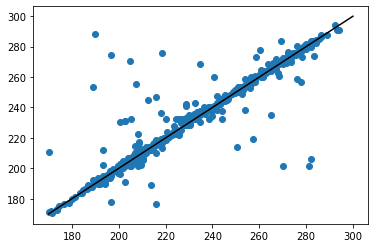

In [18]:
plt.scatter(df['lon2'],df['lon3'])
plt.plot([170,300], [170,300], 'k-')

In [8]:
asli_v3.to_csv('/Users/fridaperez/Desktop/Atmosindex/ASL_index.csv')

## Get SOI data

In [9]:
SOI = pd.read_csv(
    'https://climatedataguide.ucar.edu/sites/default/files/darwin.anom_.txt', delim_whitespace=True)
print(SOI)
SOI.to_csv('/Users/fridaperez/Desktop/Atmosindex/SOI_index.csv')


     1866  1.0  -0.1  0.9   0.3  -0.2   0.8  0.3.1   0.4  -0.1.1   0.0  -0.0  \
0    1867  1.2   0.0  1.3   0.3  -0.2   0.1   -0.0  -0.2    -0.6  -1.0   1.8   
1    1868 -0.2   0.5  1.0   0.8   1.5   1.4    0.6   0.9     0.6   0.7   1.8   
2    1869  1.5   1.0  2.3  -2.6  -1.6  -1.3   -0.3  -1.3    -0.4  -1.5  -0.9   
3    1870 -2.3  -1.2  1.5   0.6   0.9   1.0   -0.1  -1.0    -0.2   0.4   0.7   
4    1871  0.7   0.7  2.1   0.2   0.3   0.1    0.2   0.1    -0.3  -0.5  -0.5   
..    ...  ...   ...  ...   ...   ...   ...    ...   ...     ...   ...   ...   
151  2018 -1.4   0.6 -1.3   0.1   1.3   1.4   -0.0   0.5     0.4   0.4   0.7   
152  2019  0.6   2.6  1.0   0.7   1.4   1.5    1.4   1.7     2.6   0.8   1.0   
153  2020  1.0   1.0  1.7   1.1   1.5   0.6   -0.1  -0.1    -0.3  -0.6   0.3   
154  2021 -0.6  -1.4  0.7   0.3   0.4   0.8   -0.5   0.7     0.1  -0.9  -0.4   
155  2022  0.3   0.5  0.1 -99.9 -99.9 -99.9  -99.9 -99.9   -99.9 -99.9 -99.9   

      0.5  
0     0.6  
1     0.4  
2  

## Getting SAM index

In [10]:
SAM = pd.read_csv(
    'http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt', delim_whitespace=True)
print(SAM)
SAM.to_csv('/Users/fridaperez/Desktop/Atmosindex/SAM_index.csv')


       JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC
1957 -0.87 -2.27  0.07 -1.97 -2.50 -0.87  1.00 -1.73  0.72 -3.12 -5.42 -2.63
1958  0.04 -2.84 -2.52 -0.30 -2.72 -0.97 -1.65  0.97  1.90 -0.16  0.30  0.82
1959  1.59 -0.19 -0.54 -1.25 -0.32 -1.12  0.18 -1.64  2.46 -0.46  3.28 -0.38
1960  0.90  0.85  3.40 -0.35 -0.60 -0.17  0.31  0.43  1.41 -1.17  1.18  1.36
1961  0.91 -4.00 -0.40 -0.14  1.12 -0.40  0.98  1.10 -1.21  1.64  1.52  2.32
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2018  2.72  1.02 -0.03 -1.66  0.01 -1.57  0.55 -0.78  1.83  2.76  2.84  1.44
2019  2.79 -1.87  1.47  0.86 -0.11  2.21 -2.20 -2.04  0.81 -1.97 -4.42 -1.78
2020  0.57 -0.36  2.05 -1.72  1.03  1.18 -0.97 -2.20 -0.25  1.79  1.14  2.28
2021  1.95  2.19 -0.95  0.87  0.75  1.88 -1.06  0.73  1.68  0.80  2.69  2.74
2022  2.19  1.92  1.28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

[66 rows x 12 columns]
